# 시계열 데이터 분석 및 시각화

이 노트북은 생성된 시뮬레이션 데이터를 로드하고, 다양한 시각화를 통해 분석합니다.

In [1]:
# 필요한 라이브러리 임포트
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

# 스타일 설정
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")

In [2]:
# 데이터 로드
data_path = '../data/forecast_data_featured.csv'
df = pd.read_csv(data_path)
df['timestamp'] = pd.to_datetime(df['timestamp'])
print("데이터 로드 완료")
print(f"데이터 크기: {df.shape}")
print("컬럼 목록:", df.columns.tolist())
df.head()

데이터 로드 완료
데이터 크기: (788400, 14)
컬럼 목록: ['timestamp', 'store_id', 'category', 'region', 'order_count', 'sales_amount', 'day_of_week', 'hour', 'min_order_amount', 'avg_rating', 'receipt_delivery_ratio', 'receipt_take_out_ratio', 'payment_simple_pay_ratio', 'payment_credit_card_ratio']


,timestamp,store_id,category,region,order_count,sales_amount,day_of_week,hour,min_order_amount,avg_rating,receipt_delivery_ratio,receipt_take_out_ratio,payment_simple_pay_ratio,payment_credit_card_ratio
0,2022-01-01,store_001,디저트/케이크/생크림케이크,광진구,15,30008,5,0,1844,4.72,0.697917,0.251381,0.474390,0.493686
1,2022-01-01,store_002,음료/차/밀크티,영등포구,28,63468,5,0,2184,4.31,0.740711,0.300153,0.475462,0.511553
2,2022-01-01,store_003,음료/차/허브티,송파구,47,220630,5,0,2899,4.01,0.656676,0.331996,0.451198,0.496205
3,2022-01-01,store_004,음료/차/홍차,중구,11,33693,5,0,2369,4.18,0.712496,0.289606,0.522490,0.507682
4,2022-01-01,store_005,음료/차/홍차,용산구,23,45856,5,0,1565,4.94,0.704106,0.319165,0.485211,0.513677


In [3]:
# 낮 시간(11-14시) 평균 매출 계산
lunch_hours = df[(df['hour'] >= 11) & (df['hour'] <= 14)]
lunch_avg_sales = lunch_hours['sales_amount'].mean()
print(f"낮 시간(11-14시) 평균 매출: {lunch_avg_sales:,.0f} 원")

낮 시간(11-14시) 평균 매출: 724,098 원


In [4]:
# 카테고리별 낮시간 평균 매출
lunch_hours = df[(df['hour'] >= 11) & (df['hour'] <= 14)]
category_lunch_sales = lunch_hours.groupby(df['category'].str.split('/').str[0])['sales_amount'].mean().reset_index()
category_lunch_sales.columns = ['main_category', 'avg_sales']
print("카테고리별 낮시간 평균 매출:")
for _, row in category_lunch_sales.iterrows():
    print(f"{row['main_category']}: {row['avg_sales']:,.0f} 원")

카테고리별 낮시간 평균 매출:
디저트: 576,910 원
음료: 1,031,980 원
음식: 362,588 원


## 1. 기본 통계 및 개요

In [5]:
# 기본 통계
df.describe()

,timestamp,order_count,sales_amount,day_of_week,hour,min_order_amount,avg_rating,receipt_delivery_ratio,receipt_take_out_ratio,payment_simple_pay_ratio,payment_credit_card_ratio
count,788400,788400.000000,7.884000e+05,788400.000000,788400.000000,788400.000000,788400.000000,788400.000000,788400.000000,788400.000000,788400.000000
mean,2023-07-02 11:29:59.999999744,43.206811,3.904151e+05,3.001826,11.500000,1548.033333,4.837515,0.706290,0.293747,0.537483,0.462440
min,2022-01-01 00:00:00,0.000000,-7.645760e+05,0.000000,0.000000,602.000000,3.860000,0.468656,0.116508,0.370118,0.233604
25%,2022-10-01 17:45:00,0.000000,0.000000e+00,1.000000,5.750000,1095.000000,4.720000,0.666456,0.285477,0.489197,0.436672
50%,2023-07-02 11:30:00,1.000000,1.940000e+02,3.000000,11.500000,1567.500000,5.000000,0.699995,0.300019,0.510680,0.489173
75%,2024-04-01 05:15:00,31.000000,1.049952e+05,5.000000,17.250000,1936.000000,5.000000,0.733862,0.314514,0.556576,0.510716
max,2024-12-30 23:00:00,3031.000000,5.358796e+07,6.000000,23.000000,2899.000000,5.000000,1.042479,0.492848,0.855885,0.614053
std,NaN,113.434363,1.488789e+06,2.002282,6.922191,557.935743,0.238957,0.072643,0.065193,0.074684,0.073407


In [6]:
# 결측치 확인
df.isnull().sum()

timestamp                    0
store_id                     0
category                     0
region                       0
order_count                  0
sales_amount                 0
day_of_week                  0
hour                         0
min_order_amount             0
avg_rating                   0
receipt_delivery_ratio       0
receipt_take_out_ratio       0
payment_simple_pay_ratio     0
payment_credit_card_ratio    0
dtype: int64

## 2. 시간별 패턴 분석

In [7]:
# 시간별 주문량 평균
hourly_orders = df.groupby('hour')['order_count'].mean().reset_index()

fig = px.line(hourly_orders, x='hour', y='order_count', 
              title='시간별 평균 주문량',
              labels={'hour': '시간', 'order_count': '평균 주문량'})
fig.update_layout(width=600, height=400)
fig.show()

In [8]:
# 시간별 매출 평균
hourly_sales_avg = df.groupby('hour')['sales_amount'].mean().reset_index()

fig = px.line(hourly_sales_avg, x='hour', y='sales_amount', 
              title='시간별 평균 매출액',
              labels={'hour': '시간', 'sales_amount': '평균 매출액'})
fig.update_layout(width=600, height=400)
fig.show()

In [9]:
# 요일별 주문량
weekday_orders = df.groupby('day_of_week')['order_count'].mean().reset_index()
weekday_names = ['월', '화', '수', '목', '금', '토', '일']
weekday_orders['day_name'] = weekday_orders['day_of_week'].map(lambda x: weekday_names[x])

fig = px.bar(weekday_orders, x='day_name', y='order_count', 
             title='요일별 평균 주문량',
             labels={'day_name': '요일', 'order_count': '평균 주문량'})
fig.update_layout(width=600, height=400)
fig.show()

## 3. 가게별 분석

In [10]:
# 가게별 총 주문량
store_orders = df.groupby('store_id')['order_count'].sum().reset_index().sort_values('order_count', ascending=False)

fig = px.bar(store_orders, x='store_id', y='order_count', 
             title='가게별 총 주문량',
             labels={'store_id': '가게 ID', 'order_count': '총 주문량'})
fig.update_layout(width=800, height=400)  # 가게가 많아 폭 조금 넓게
fig.show()

In [11]:
# 가게별 평균 평점 분포
store_ratings = df.groupby('store_id')['avg_rating'].mean().reset_index()

fig = px.histogram(store_ratings, x='avg_rating', 
                   title='가게별 평균 평점 분포',
                   labels={'avg_rating': '평균 평점'})
fig.update_layout(width=600, height=400)
fig.show()

## 4. 카테고리별 분석

In [12]:
# 카테고리별 주문량
category_orders = df.groupby('category')['order_count'].sum().reset_index().sort_values('order_count', ascending=False)

fig = px.bar(category_orders, x='category', y='order_count', 
             title='카테고리별 총 주문량',
             labels={'category': '카테고리', 'order_count': '총 주문량'})
fig.update_xaxes(tickangle=45)
fig.update_layout(width=700, height=400)  # 카테고리 이름 길어 폭 중간
fig.show()

In [13]:
# 지역별 주문량
region_orders = df.groupby('region')['order_count'].sum().reset_index().sort_values('order_count', ascending=False)

fig = px.bar(region_orders, x='region', y='order_count', 
             title='지역별 총 주문량',
             labels={'region': '지역', 'order_count': '총 주문량'})
fig.update_layout(width=600, height=400)
fig.show()

## 5. 매출 분석

In [14]:
# 가게별 매출 추이 (증가/감소 확인)
store_sales_trend = df.groupby(['store_id', df['timestamp'].dt.date])['sales_amount'].sum().reset_index()
store_sales_trend['timestamp'] = pd.to_datetime(store_sales_trend['timestamp'])

# 샘플 가게 5개 선택
sample_stores = df['store_id'].unique()[:5]
sample_trend = store_sales_trend[store_sales_trend['store_id'].isin(sample_stores)]

fig = px.line(sample_trend, x='timestamp', y='sales_amount', color='store_id', 
              title='샘플 가게별 매출 추이 (증가/감소 확인)',
              labels={'timestamp': '날짜', 'sales_amount': '매출액'})
fig.update_layout(width=800, height=400)  # 시계열이라 폭 넓게
fig.show()

In [15]:
# 시간별 매출 추이
hourly_sales = df.groupby(df['timestamp'].dt.date)['sales_amount'].sum().reset_index()
hourly_sales['timestamp'] = pd.to_datetime(hourly_sales['timestamp'])

fig = px.line(hourly_sales, x='timestamp', y='sales_amount', 
              title='일별 매출 추이',
              labels={'timestamp': '날짜', 'sales_amount': '매출액'})
fig.update_layout(width=800, height=400)  # 시계열이라 폭 넓게
fig.show()

In [16]:
# 결제 방식 비율 분석
payment_cols = ['payment_simple_pay_ratio', 'payment_credit_card_ratio']
payment_means = df[payment_cols].mean()

fig = px.pie(values=payment_means.values, names=payment_means.index, 
             title='평균 결제 방식 비율')
fig.update_layout(width=500, height=400)  # 파이 차트는 폭 좁게
fig.show()

## 6. 상관관계 분석

/Users/coldbrew_groom/Documents/order-platform-mlops/order-platform-msa-train-pipeline/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) Arial.

/Users/coldbrew_groom/Documents/order-platform-mlops/order-platform-msa-train-pipeline/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from font(s) Arial.

/Users/coldbrew_groom/Documents/order-platform-mlops/order-platform-msa-train-pipeline/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 44036 (\N{HANGUL SYLLABLE GAN}) missing from font(s) Arial.

/Users/coldbrew_groom/Documents/order-platform-mlops/order-platform-msa-train-pipeline/.venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning:

Glyph 49345 (\N{HANGUL SYLLABLE SANG}) missing from font(s) Arial.

/Users/coldbrew_groom/Documents/order-platform-mlops/order

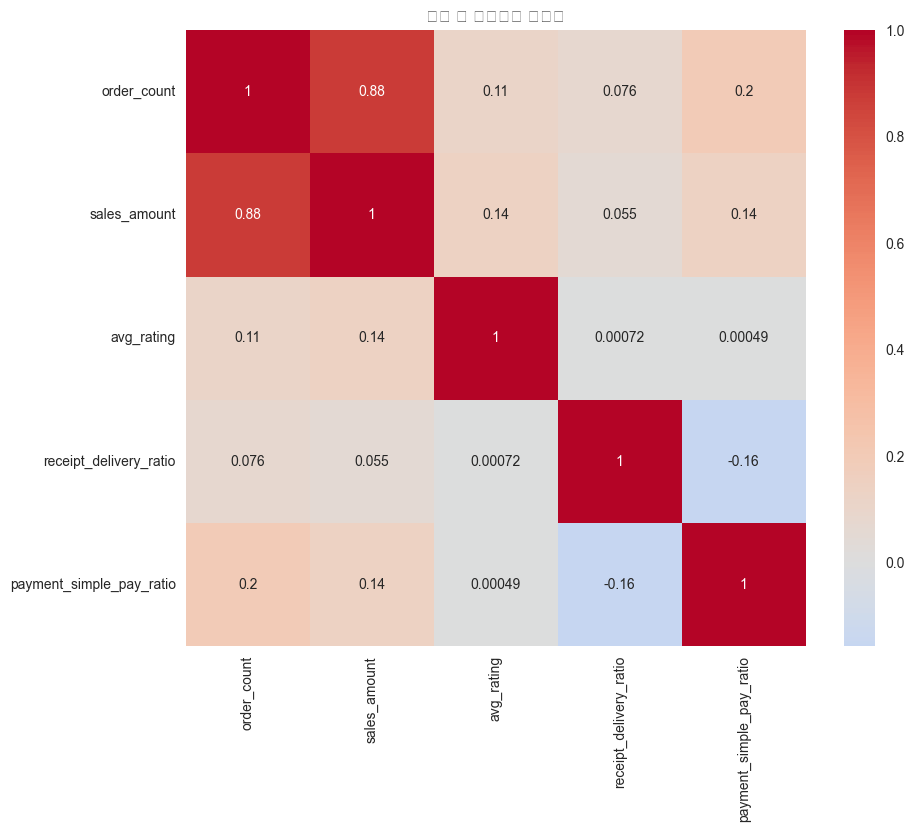

In [17]:
# 주요 변수 간 상관관계
correlation_cols = ['order_count', 'sales_amount', 'avg_rating', 'receipt_delivery_ratio', 'payment_simple_pay_ratio']
corr_matrix = df[correlation_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('변수 간 상관관계 히트맵')
plt.show()

## 7. 이상치 탐지

In [18]:
# 주문량 이상치 탐지 (IQR 방법)
Q1 = df['order_count'].quantile(0.25)
Q3 = df['order_count'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['order_count'] < lower_bound) | (df['order_count'] > upper_bound)]
print(f"주문량 이상치 개수: {len(outliers)}")
print(f"이상치 비율: {len(outliers)/len(df)*100:.2f}%")

# 이상치 시각화
fig = px.box(df, y='order_count', title='주문량 분포 및 이상치')
fig.update_layout(width=600, height=400)
fig.show()

주문량 이상치 개수: 113378
이상치 비율: 14.38%


## 결론
이 노트북을 통해 생성된 시뮬레이션 데이터를 다양한 관점에서 분석했습니다. 추가 분석이 필요하다면 코드를 수정하여 사용하세요.